In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

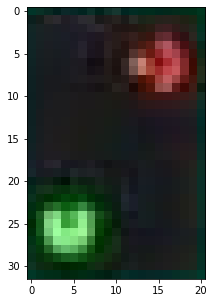

In [2]:
image = cv2.imread('~/Desktop/Projects/yolov5/runs/detect/exp5/traffic-signal.jpeg')  
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image[30:62,99:120,:]
plt.figure(figsize=(8,5))
plt.imshow(image)

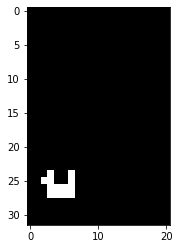

In [3]:
ret, thres = cv2.threshold(image[:,:,1],200,255,0)
edged = cv2.Canny(thres, 30, 225,4)
contours, hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
dest_img = cv2.drawContours(image, contours, -1, (0,255,0), 1)
plt.imshow(thres, cmap='gray')

In [4]:
if len(contours)>0:
    contours_s = np.vstack(contours)
    x2,y2, x1, y1 = np.max(contours_s[:,0,0]),np.max(contours_s[:,0,1]), np.min(contours_s[:,0,0]),np.min(contours_s[:,0,1])
else:
    x2,y2, x1, y1 = 0,0,0,0

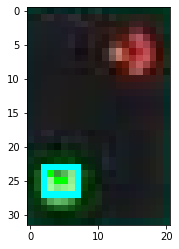

In [5]:
plt.imshow(cv2.rectangle(image,(x1,y1), (x2,y2), (0,255,255),1))